In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('./Sunspots.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252 entries, 0 to 3251
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               3252 non-null   object 
 1   Monthly Mean Total Sunspot Number  3252 non-null   float64
dtypes: float64(1), object(1)
memory usage: 50.9+ KB


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


## Time Series Plot

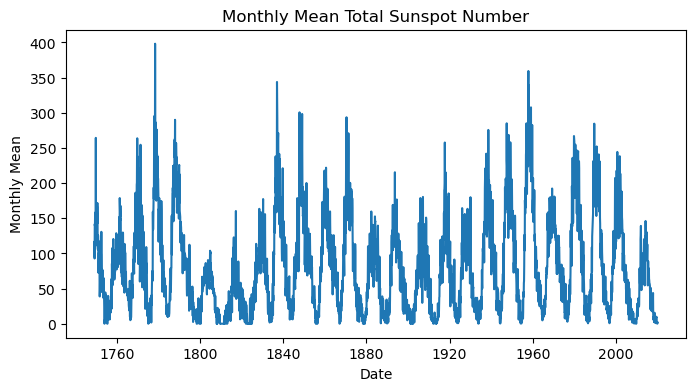

In [4]:
plt.figure(figsize=(8,4))
plt.plot(df)
plt.title('Monthly Mean Total Sunspot Number')
plt.xlabel('Date')
plt.ylabel('Monthly Mean')
plt.show()

For a time series to be considered stationary:
- Constant mean
- Constant variance
- No seasonality

## Time Series Decomposition

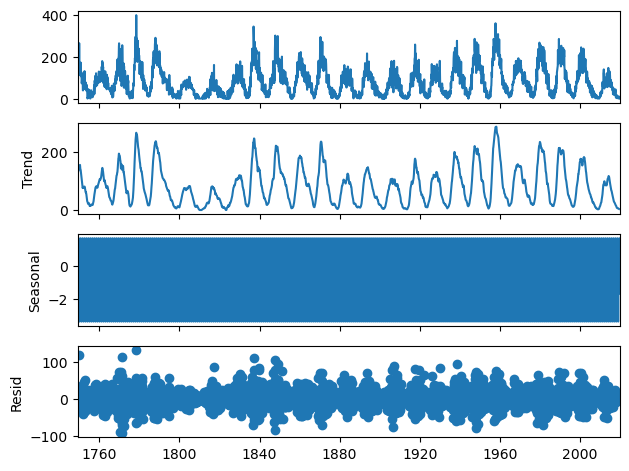

In [5]:
result = seasonal_decompose(df, model='additive')
result.plot()
plt.show()

## Stationary test

In [6]:
def adf_test(timeseries):
    print('Results of Augmented Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [7]:
adf_test(df['Monthly Mean Total Sunspot Number'])

Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.048087e+01
p-value                        1.214714e-18
#Lags Used                     2.800000e+01
Number of Observations Used    3.223000e+03
Critical Value (1%)           -3.432381e+00
Critical Value (5%)           -2.862437e+00
Critical Value (10%)          -2.567248e+00
dtype: float64
